In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# Data Exploration

In [7]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Cleansing Data

In [8]:
# Try chaging TotalCharges to numeric type
df.TotalCharges = pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [15]:
# Check the " " values (Only 11 rows)
df[df.TotalCharges == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [16]:
# Remove rows that contain missing value in TotalCharges
df = df[df.TotalCharges != " "]

In [17]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

C:\Users\User\AppData\Local\Temp\ipykernel_10732\1304330689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TotalCharges = pd.to_numeric(df.TotalCharges)


In [66]:
def convert_tenure(tenure):
    
    if tenure <= 24: #If tenure is less than or equal to 2 years
        return '0 - 24 months'
    elif tenure <= 36:
         return '25 - 36 months'
    elif tenure <= 48:
         return '37 - 48 months'
    elif tenure <= 60:
         return '49 - 60 months'
    else:
         return 'Over 60 months'

In [67]:
df['tenure'] = df['tenure'].map(convert_tenure)
df['tenure'].value_counts()

tenure
0 - 24 months     3194
Over 60 months    1406
25 - 36 months     832
49 - 60 months     832
37 - 48 months     760
Name: count, dtype: int64

In [77]:
cols = df.columns
cols = cols.drop(['customerID', 'MonthlyCharges',  'TotalCharges'])
list_of_cols = list(cols)


# Import label encoder
from sklearn.preprocessing import LabelEncoder
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = LabelEncoder()
for col in list_of_cols:
# Encode labels in column 'species'.
    df[col]= label_encoder.fit_transform(df[col])
  
df[list_of_cols].head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
1,1,0,0,0,1,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,2,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
5,0,0,0,0,0,1,2,1,0,0,2,0,2,2,0,1,2,1


# Building the Decision Tree model

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                                                        df.drop(['customerID', 'Churn',  'TotalCharges'], axis=1),
                                                                        df.Churn,
                                                                        test_size=0.2,
                                                                        random_state=0,
                                                                        stratify=df.Churn
                                                                      )


In [83]:
from sklearn.tree import DecisionTreeClassifier

dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(0.5, 0.875, 'x[14] <= 0.5\nentropy = 0.835\nsamples = 5619\nvalue = [4125, 1494]'),
 Text(0.25, 0.625, 'x[8] <= 0.5\nentropy = 0.985\nsamples = 3088\nvalue = [1767, 1321]'),
 Text(0.125, 0.375, 'x[7] <= 0.5\nentropy = 1.0\nsamples = 2099\nvalue = [1023, 1076]'),
 Text(0.0625, 0.125, 'entropy = 0.944\nsamples = 677\nvalue = [432, 245]'),
 Text(0.1875, 0.125, 'entropy = 0.979\nsamples = 1422\nvalue = [591, 831]'),
 Text(0.375, 0.375, 'x[9] <= 0.5\nentropy = 0.808\nsamples = 989\nvalue = [744, 245]'),
 Text(0.3125, 0.125, 'entropy = 0.923\nsamples = 340\nvalue = [225, 115]'),
 Text(0.4375, 0.125, 'entropy = 0.723\nsamples = 649\nvalue = [519, 130]'),
 Text(0.75, 0.625, 'x[17] <= 93.675\nentropy = 0.36\nsamples = 2531\nvalue = [2358, 173]'),
 Text(0.625, 0.375, 'x[14] <= 1.5\nentropy = 0.247\nsamples = 1921\nvalue = [1842, 79]'),
 Text(0.5625, 0.125, 'entropy = 0.384\nsamples = 881\nvalue = [815, 66]'),
 Text(0.6875, 0.125, 'entropy = 0.097\nsamples = 1040\nvalue = [1027, 13]'),
 Tex

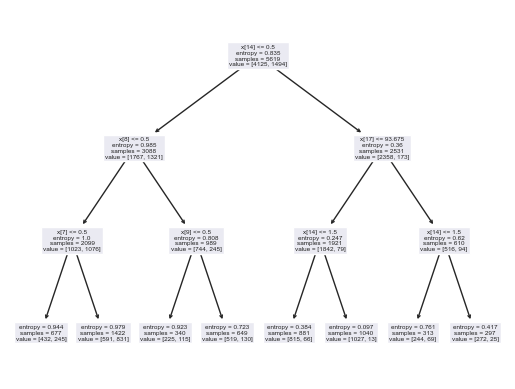

In [84]:
from sklearn import tree
tree.plot_tree(dt_entropy.fit(X_train, y_train))

# Model Evaluation

In [92]:
dt_entropy.score(X_train, y_train)

0.7768286171916711

In [93]:
dt_entropy.score(X_test, y_test)

0.7693950177935943

In [100]:
y_pred = dt_entropy.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

# Confusion Matrix and Classification Report

In [95]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, precision_recall_fscore_support, f1_score, ConfusionMatrixDisplay

In [101]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[881, 150],
       [174, 200]], dtype=int64)

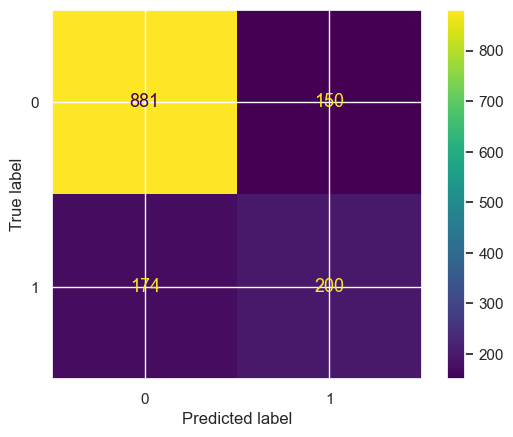

In [102]:
plt.rcParams['font.size']=13
plot_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
plot_cm.plot()
plt.show()

In [103]:
print(classification_report(y_train, dt_entropy.predict(X_train)))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4125
           1       0.58      0.56      0.57      1494

    accuracy                           0.78      5619
   macro avg       0.71      0.71      0.71      5619
weighted avg       0.77      0.78      0.78      5619



In [104]:
print(classification_report(y_test, dt_entropy.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1031
           1       0.57      0.53      0.55       374

    accuracy                           0.77      1405
   macro avg       0.70      0.69      0.70      1405
weighted avg       0.76      0.77      0.77      1405

